# Setup

Import the necessary packages and show the first five rows of the dataset.

We already assume from the feature names that the sample code number will have nothing to do with the target and we discard this feature.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Custom functions
def mysubplot():
    fig, ax = plt.subplots(3,3,figsize=(15,15))
    ax = ax.flatten()
    fig.delaxes(ax[-1])
    return (fig,ax)

def class_stats(df,feature,keys):
    left = df[df[feature] == 0].describe()
    right = df[df[feature] == 1].describe()
    label_list = left.index.values
    return pd.concat([left, right], keys=keys).swaplevel(0,1).sort_index().reindex(axis='index', level=0, labels=label_list)

# Make sure the dataset is correctly imported
column_names = ['Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
                'Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Single Epithelial Cell Size',
                'Bare Nuclei',
                'Bland Chromatin',
                'Normal Nucleoli',
                'Mitoses',
                'Class']
breastcancer = pd.read_csv('breastcancer/breast-cancer-wisconsin.data',
                           names = column_names, 
                           index_col = 'Sample code number')
breastcancer.tail()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4
897471,4,8,6,4,3,4,10,6,1,4
897471,4,8,8,5,4,5,10,4,1,4


---
# Preprocessing

## Binary Problem

Convert the `Class` feature from 2 - 4 to 0 - 1 for "benign" - "malignant".

In [2]:
breastcancer.Class = breastcancer.Class.map(lambda Class: int(Class > 3))

breastcancer.tail()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
776715,3,1,1,1,3,2,1,1,1,0
841769,2,1,1,1,2,1,1,1,1,0
888820,5,10,10,3,7,3,8,10,2,1
897471,4,8,6,4,3,4,10,6,1,1
897471,4,8,8,5,4,5,10,4,1,1


## Problematic samples

Reading the given description of the dataset, we know some samples have missing features. We choose to discard them.

In [3]:
breastcancer[breastcancer.eq('?').any(axis=1)]

C:\Users\95juj\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1057013,8,4,5,1,2,?,7,3,1,1
1096800,6,6,6,9,6,?,7,8,1,0
1183246,1,1,1,1,1,?,2,1,1,0
1184840,1,1,3,1,2,?,2,1,1,0
1193683,1,1,2,1,3,?,1,1,1,0
1197510,5,1,1,1,2,?,3,1,1,0
1241232,3,1,4,1,2,?,3,1,1,0
169356,3,1,1,1,2,?,3,1,1,0
432809,3,1,3,1,2,?,2,1,1,0


As indicated in the description file, there are 16 samples that are missing a `Bare Nuclei` value. We eliminate those samples.

In [4]:
clean_breastcancer = breastcancer[breastcancer.ne('?').all(axis=1)].astype('int64')

clean_breastcancer.tail()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
776715,3,1,1,1,3,2,1,1,1,0
841769,2,1,1,1,2,1,1,1,1,0
888820,5,10,10,3,7,3,8,10,2,1
897471,4,8,6,4,3,4,10,6,1,1
897471,4,8,8,5,4,5,10,4,1,1


## Statistics
Compute statistics for the two classes

In [5]:
class_stats(clean_breastcancer,'Class',['benign','malignant'])

Clump Thickness  Uniformity of Cell Size  \
count benign          444.000000               444.000000   
      malignant       239.000000               239.000000   
mean  benign            2.963964                 1.306306   
      malignant         7.188285                 6.577406   
std   benign            1.672661                 0.855657   
      malignant         2.437907                 2.724244   
min   benign            1.000000                 1.000000   
      malignant         1.000000                 1.000000   
25%   benign            1.000000                 1.000000   
      malignant         5.000000                 4.000000   
50%   benign            3.000000                 1.000000   
      malignant         8.000000                 6.000000   
75%   benign            4.000000                 1.000000   
      malignant        10.000000                10.000000   
max   benign            8.000000                 9.000000   
      malignant        10.000000                10.000000   

                 Uniformity of Cell Shape  Marginal Adhesion  \
count benign                   444.000000         444.000000   
      malignant                239.000000         239.000000   
mean  benign                     1.414414           1.346847   
      malignant                  6.560669           5.585774   
std   benign                     0.957031           0.917088   
      malignant                  2.569104           3.196631   
min   benign                     1.000000           1.000000   
      malignant                  1.000000           1.000000   
25%   benign                     1.000000           1.000000   
      malignant                  4.000000           3.000000   
50%   benign                     1.000000           1.000000   
      malignant                  6.000000           5.000000   
75%   benign                     1.000000           1.000000   
      malignant                  9.000000           8.000000   
max   benign                     8.000000          10.000000   
      malignant                 10.000000          10.000000   

                 Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
count benign                      444.000000   444.000000       444.000000   
      malignant                   239.000000   239.000000       239.000000   
mean  benign                        2.108108     1.346847         2.083333   
      malignant                     5.326360     7.627615         5.974895   
std   benign                        0.877112     1.177848         1.062299   
      malignant                     2.443087     3.116679         2.282422   
min   benign                        1.000000     1.000000         1.000000   
      malignant                     1.000000     1.000000         1.000000   
25%   benign                        2.000000     1.000000         1.000000   
      malignant                     3.000000     5.000000         4.000000   
50%   benign                        2.000000     1.000000         2.000000   
      malignant                     5.000000    10.000000         7.000000   
75%   benign                        2.000000     1.000000         3.000000   
      malignant                     6.500000    10.000000         7.000000   
max   benign                       10.000000    10.000000         7.000000   
      malignant                    10.000000    10.000000        10.000000   

                 Normal Nucleoli     Mitoses  Class  
count benign          444.000000  444.000000  444.0  
      malignant       239.000000  239.000000  239.0  
mean  benign            1.261261    1.065315    0.0  
      malignant         5.857741    2.602510    1.0  
std   benign            0.954606    0.509738    0.0  
      malignant         3.348876    2.564495    0.0  
min   benign            1.000000    1.000000    0.0  
      malignant         1.000000    1.000000    1.0  
25%   benign            1.000000    1.000000    0.0  
      malignant        

### Distribution plots by category

In this section, we will build an intuition about the important features for separating the two classes.
The trace is a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) built from the histograms.

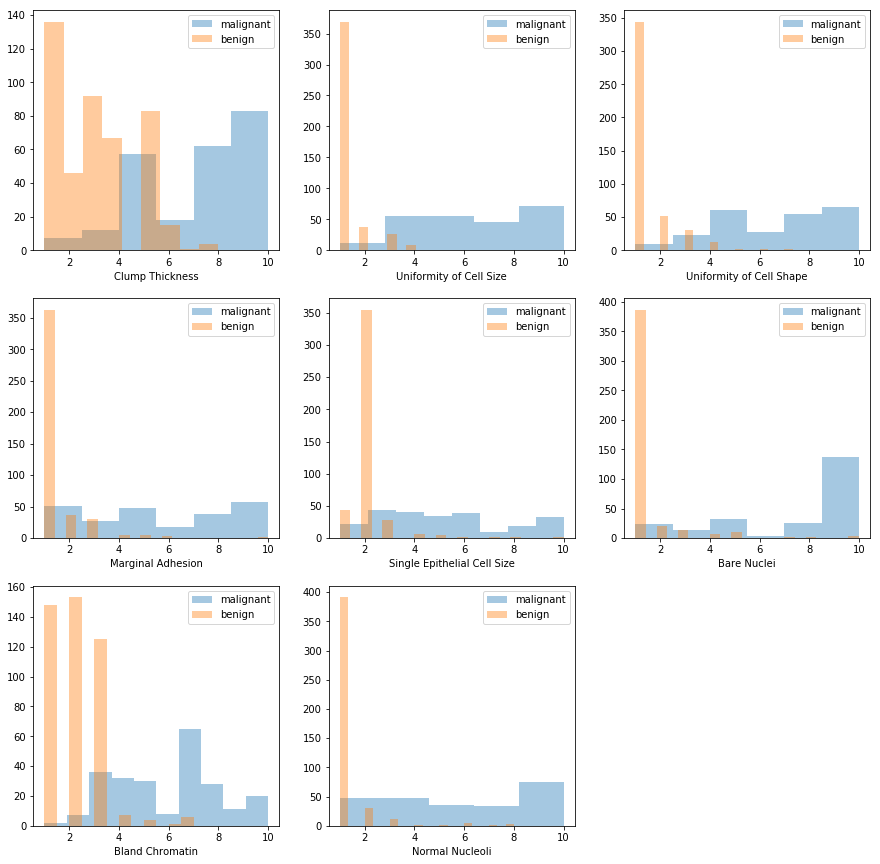

In [9]:
# Histograms for good and bad wines
fig, ax = mysubplot()
for i,feature in enumerate(clean_breastcancer.columns[:-1]):
    sns.distplot(a=clean_breastcancer[clean_breastcancer.Class == 1][feature],label='malignant',ax=ax[i],kde=False)
    sns.distplot(a=clean_breastcancer[clean_breastcancer.Class == 0][feature],label='benign',ax=ax[i],kde=False)
    ax[i].legend()
    
plt.savefig('hist.png')

All features have a discrete range from 1 to 10.

We can already perceive that the features all features related to the `benign` tumors are ranging in low values. `Malignant` tumors are more spreaded and take values in the full range. The standard deviation attests this observation.

Appart from feature `Clump Thickness`, all distribution have little overlap between the two classes, as shown by the distance between each feature mean between the two classes.

## Correlation Matrix

We will now center the variables and normalize them to have all variables interracting in the same range.


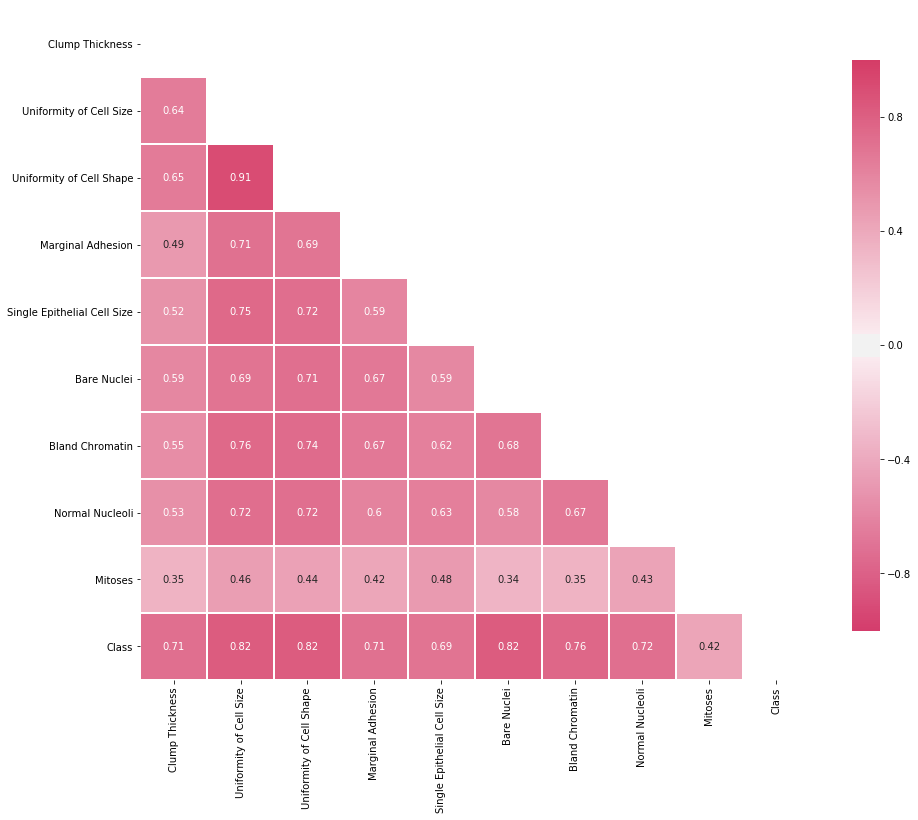

In [28]:
clean_norm_breastcancer = (clean_breastcancer - clean_breastcancer.mean())/clean_breastcancer.std()
corr = clean_norm_breastcancer.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(-1, 1, as_cmap=True,n=100)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .7},annot=True)
plt.savefig('corr.png')

We observe that several variables have some linear correlation :
   * Cell Size, Cell Shape and the target are highly correlated, those features are redundant and one of them could be discarded.
   * Bare Nuclei and the target.

# Export cleaned data

In [8]:
clean_breastcancer.to_csv('breastcancer/clean_breastcancer.csv')
print('done')

done
